#MAIN



<aside>
💡 Develop a Python program to generate a list of $2n$ unique random positive integers, each using a maximum of $n$ bits and represented in decimals, and another random positive integer, $k$ , using $n$ bits.  Then, choose one (or more, if you prefer) of the following options to implement:

1. Check if $k$ exists in the list.
2. Find all integers less than $k$ in the list.

Display the results and the number of steps required to achieve them.

</aside>

In [15]:
import random as rd

""" If needed, increase the limit for integer string conversion, since jpynb file limit them

import sys
sys.set_int_max_str_digits(1000)"""

' If needed, increase the limit for integer string conversion, since jpynb file limit them\n\nimport sys\nsys.set_int_max_str_digits(1000)'

In [2]:
def generate_random_list(n: int):
  """
  Input:
    n: The number of bits to use for each integer.
  Output:
    A k random positive integers and a list of 2n unique random positive integers (decimal).
  """
  # Raise an error if the number of bits is less than or equal to 1,
  # or if the number of bits is not a integer as this would not produce a valid random integer.
  assert n > 0, "n must be greater than 0."
  assert isinstance(n, int), "n must be an integer."

  # Create a set to store the generated integers to ensure uniqueness.
  unique_integers = set()
  k = rd.randint(1, 2**n ) # Create k

  # Generate random integers until the set has 2n elements.
  while len(unique_integers) < 2 * n:
    # Generate a random integer using the maximum number of bits.
    random_integer = rd.randint(1, 2**n)
    unique_integers.add(random_integer)

  return k, list(unique_integers)

#example usage
k, list_n = generate_random_list(20)
list_n = sorted(list_n)
print(k, list_n)

163906 [36299, 116886, 198533, 203610, 212171, 346932, 349032, 351141, 371509, 378339, 425384, 430647, 434360, 504790, 516590, 520815, 555383, 568102, 589314, 613284, 634686, 635571, 642630, 671391, 672174, 717800, 721374, 736971, 740241, 740324, 755661, 781732, 808350, 849203, 855203, 917622, 940063, 950575, 993857, 1043874]


#MOST SIMPLE RESULT (Linear search)


In [3]:
print(f"k = {k} exists in the list."
      if k in list_n else
      f"k = {k} does not exist in the list.")

k = 163906 does not exist in the list.


In [4]:
print(f"Integers less than k in the list: {[integer for integer in list_n if integer < k]}")

Integers less than k in the list: [36299, 116886]


#GENERATE RESULT AND STEPS's CODE

In [5]:
def check_k_BinarySearch(k: int, array: list[int], low= 0, steps= 0):
  """Checks if k exists in the list and counts steps.

  Input:
      array: A list of random positive integers.
      k: Another random positive integer.
      steps: An optional counter variable (default 0).

  Output:
      A boolean value indicate k is really exist, the number of steps taken and the index postion of k.
  """
  # Repeat until the pointers low and high meet each other
  high = len(array)-1
  while low <= high:
      steps += 1 # Count step for each iteration
      mid = low + (high - low)//2
      if array[mid] == k:
          return True, steps, mid # K found
      elif array[mid] < k:
          low = mid + 1
      else:
          high = mid - 1
  return False, steps, mid # K not found

# example usage
k_exist, ste, position = check_k_BinarySearch(k, list_n)
print((k_exist, ste), position)

(False, 5) 2


In [6]:
def find_less_than_k(position: int, list_input: list[int], steps=1):
  """
    Finds all elements in the list that are less than a specific position (index) in the list.

    Args:
        position: The index (position) in the list to use as a reference.
        list_input: The input list of integers.
        steps: An optional counter variable (default 1).

    Returns:
        A new list containing numbers that less than k and number of steps taken (alway 1 + steps of check_k_BinarySearch() ).
    """
  new_list = list_input[:position]
  return new_list, steps

# example usage
list_nk = find_less_than_k(position, list_n)
print(list_nk)

([36299, 116886], 1)


# 💬 Discussion

1. For positive integers (numbers greater than 0), the `.randint()` function provides a more controllable random number range compared to the .getrandbits() function. While useful, `.getrandbits()` only uses one parameter n to generate values from 0 to 2^n (excluding 0).  The `.randint()` function, however, can generate duplicate values.  To ensure unique values and maintain the appropriate data format for calculations, the initial list of random numbers can be converted into a set using the `set()` function. Sets inherently do not allow duplicates. Finally, the set can be converted back to a  list using the `list()` function for compatibility with further operations.

    🔺 **Additional Infor** : Using `sorted()` for better computational resource of `check_k_BinarySearch()` and `find_less_than_k()`

2. By using Binary Search algorithm, it can archive the most optimize solution for search and check k in the random list. And the steps are vary from our initial n numbers, for example:

        n = 20
        k = 761184
        list = [99226, 121049, 142344, 147790, 207430, 227912, 246622, 252899, 283137, 285602,
                314936, 378224, 378640, 383745, 384281, 403282, 449425, 470670, 486480, 544798,
                554847, 606470, 655464, 675735, 692531, 735462, 765299, 776859, 804453, 812732,
                813332, 924053, 954573, 960322, 975899, 976870, 1002966, 1013055, 1021620, 1041776]
        check_k_BinarySearch(k, list)
        # Will give out (False, 5) which is k isn't exist and cost only 5 steps to verify it


+ For `check_k_BinarySearch()` : In the best case scenario, the function can find the target element in just one comparison, resulting in a time complexity of O(1). On the other hand, the worst-case scenario requires traversing the entire sorted array, leading to a complexity of O(log n). The average case complexity, where the target element is found somewhere in the middle on average, is also O(log n)."


+ For `find_less_than_k()` : based on the `check_k_BinarySearch()`, that initialy give out the index position, it will only cost 1 more step to include the list from the start to that position. So the complexity will be O(log n)

3. Task 1a (specifically if using linear algorithm) can be improve by using quantum circuit, while it doesn't require quantum computing for significant improvement, but for "checking k in the list" task could archive a theoretical advantage.

    # Comparing Classical & Quantum Approach  

    + Classical: Searching a list of size 2^n for a specific element can be done in `O(n)` time by using linear search. These are a very basic solution for searching problem

    + Quantum: one of the most famous quantum search algorithm, Grover's algorithm, can find an element in an unsorted list with a runtime complexity of `O(sqrt(n))`. This could be potentially faster for very large values of n (millions or billions).

  -> So we can't more agree that the runtime complexity is increasingly reduce from `O(n)` to `O(sqrt(n))`


  + But when mentioned "theoretical advantage", while Grover's algorithm offers a theoretical speedup for searching large datasets by leveraging superposition, explores all possibilities simultaneously, it might not be practical for typical list sizes.
  
  + Implementing and running a quantum program can be complex, and the overhead might outweigh the benefit for smaller lists. Additionally, current quantum computers are prone to errors, and correcting those errors adds significant computational cost.


# **TESTING**


In [7]:
import random as rd

def generate_random_list(n: int):
  unique_integers = set()
  k = rd.randint(0, 2**n)
  while len(unique_integers) < 2 * n:
    random_integer = rd.randint(0, 2**n)
    unique_integers.add(random_integer)
  return k, list(unique_integers)

def check_k_BinarySearch(k: int, array: list[int], low= 0, steps= 0):
  high = len(array)-1
  while low <= high:
      steps += 1
      mid = low + (high - low)//2
      if array[mid] == k:
          return True, steps, mid
      elif array[mid] < k:
          low = mid + 1
      else:
          high = mid - 1
  return False, steps, mid

def find_less_than_k(position: int, list_input: list[int], steps=1):

  new_list = list_input[:position]
  return new_list, steps

k, list_n = generate_random_list(10)
k_exist, ste, position = check_k_BinarySearch(k, list_n)
list_nk = find_less_than_k(position, list_n)
print(k, list_n)
print((k_exist, ste))
print(list_nk)

471 [3, 390, 9, 10, 652, 655, 16, 656, 401, 532, 152, 26, 944, 306, 823, 955, 340, 989, 105, 884]
(False, 5)
([3, 390, 9], 1)


#QIKIST INSTALL & CHECK

In [ ]:
%pip install qiskit
%pip install qiskit_algorithms

In [9]:
# prompt: check all the above library versions

import qiskit
import qiskit_algorithms

print(f"qiskit version: {qiskit.__version__}")
print(f"qiskit_algorithms version: {qiskit_algorithms.__version__}")


qiskit version: 0.45.1
qiskit_algorithms version: 0.3.0


#🔥 Bonus 1
Using a quantum solution (Grover's searching algorithm) and implement a quantum program using Qiskit, to solve Task 1a (Search for k's existence in the list).

Since we now consider for quantum algorithm approaching, knowing quantum algorithm only intake binary number, changing our initial integer value into binary for processing and changing back to integer value (if needed) is a requirement


1. Initialtively our number ( K and The List ) then convert them from Integers to Binary Strings

In [10]:
# Example values(only changing these for testing the quantum circuit)
n = 10
k, list_n = [857, [128, 897, 903, 655, 272,
                   23, 666, 31, 932, 833,
                   73, 75, 212, 986, 872,
                   233, 371, 890, 253, 894]]

# Binary strings converting
list_n_bit = [bin(i)[2:].zfill(n) for i in list_n]
k_Q = bin(k)[2:].zfill(n)

print(list_n_bit)
print(k_Q)

['0010000000', '1110000001', '1110000111', '1010001111', '0100010000', '0000010111', '1010011010', '0000011111', '1110100100', '1101000001', '0001001001', '0001001011', '0011010100', '1111011010', '1101101000', '0011101001', '0101110011', '1101111010', '0011111101', '1101111110']
1101011001



2. Set Up the Quantum Circuit, for example, if your search space includes integers from 0 to 15, you'll need 4 qubits (2^4 = 16 possible states). In our case, our 2*n list could contain values up to 10 bits in binary (2^10 = 1024 possible states), so we need 10 qubits for measuring and comparing (that why our k_Q have to take `.z_full(n)` ).

c:\Users\quang\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


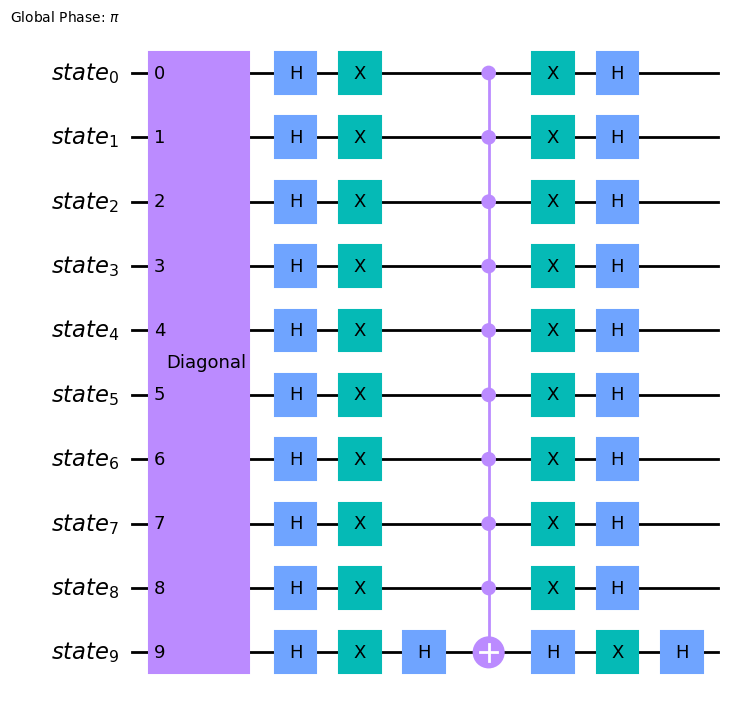

In [11]:
from qiskit import QuantumCircuit
from qiskit_algorithms import AmplificationProblem
from qiskit_algorithms import Grover
from qiskit.primitives import Sampler
from qiskit.quantum_info import Statevector

# Initial a n qubits circuit based on our k_Q bits value.
# These 10 qubits containing 2^10 state, the state we desire to find is 'k_Q = 1110010000'
# Mark the k_Q state for a higher amplitude than other
oracle = Statevector.from_label(k_Q)

# define Grover's algorithm
# Mark the state of each value in the list, giving it a little bit higher amplitude than all other state
problem = AmplificationProblem(oracle, is_good_state=list_n_bit)

# draw the circuit by decompose() the grover operator to see it expanded into its component gates.
problem.grover_operator.decompose().draw(output="mpl")

In [12]:
grover = Grover(sampler=Sampler())
result = grover.amplify(problem)

In [13]:
print("Result type:", type(result))
print()
print("Top measurement:", result.top_measurement)
print("Oracle evaluation:", result.oracle_evaluation)
print(f"{result.top_measurement} or k value ({k}) does exist in the list" if result.oracle_evaluation else f"{result.top_measurement} or k value ({k}) does not exist in the list")
print(f"of {list_n}")

Result type: <class 'qiskit_algorithms.amplitude_amplifiers.grover.GroverResult'>

Top measurement: 1101011001
Oracle evaluation: False
1101011001 or k value (857) does not exist in the list
of [128, 897, 903, 655, 272, 23, 666, 31, 932, 833, 73, 75, 212, 986, 872, 233, 371, 890, 253, 894]


In [14]:
print(result)

{   'assignment': '1101011001',
    'circuit_results': [   {   '0000000000': 0.00096894800663,
                               '0000000001': 0.00096894800663,
                               '0000000010': 0.00096894800663,
                               '0000000011': 0.00096894800663,
                               '0000000100': 0.00096894800663,
                               '0000000101': 0.00096894800663,
                               '0000000110': 0.00096894800663,
                               '0000000111': 0.00096894800663,
                               '0000001000': 0.00096894800663,
                               '0000001001': 0.00096894800663,
                               '0000001010': 0.0009689480066299,
                               '0000001011': 0.0009689480066299,
                               '0000001100': 0.00096894800663,
                               '0000001101': 0.00096894800663,
                               '0000001110': 0.00096894800663,
                   

**To summarize and for easier imagine, we can say that it find the highest posibility of that state when coming though the circuit, or through these steps:**

1. Superposition:  Imagine a list of qubits (not numbers), one for each element in the search space.  Initially, these qubits are all in a uniform superposition, meaning they can represent both 0 and 1 simultaneously. This creates a state where all possibilities have an equal chance.

2. Oracle Function: This function acts like a filter. When given a specific element (k, the one we looking for in the list), it "marks" the corresponding qubit in the superposition by performing a specific operation. Essentially, it increases the amplitude (think of it as a weight) associated with the target state.

3. Grover Diffusion Operator: This operator ensures fairness by spreading the amplitude throughout the superposition again. While it increases the target state's amplitude, it doesn't completely neglect other possibilities. This process is repeated a specific number of times based on the search space size.

4. Measurement:  Finally, we measure the qubits. This collapses the superposition, forcing one specific state to be observed. Ideally, it will be the element we were searching for (the one marked by the oracle).


  Then finally can checkout and give us the result whether k exist in the list or not

#🔥 Bonus 2
Propose a simple deployment approach for this task by packaging your program in a Docker container and publishing these implementations as API services using any API frameworks (such as Flask and FastAPI). Implement your proposal if possible.

In [ ]:
#docker wont work for some reason :(